In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

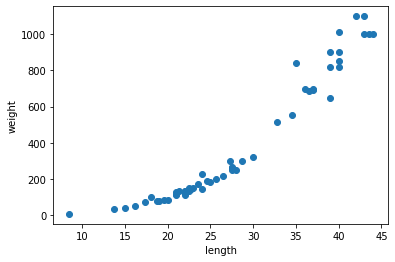

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 


사이킷런의. model_selection 모듈에서 train_test_split함수를 가져옴

In [ ]:
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

불러온 데이터를 각각 훈련세트와 테스트 세트로 나눔.
무게와 길이를 합쳐서 input에 나눴던 전장과 달리 길이를 통해 무게를 유추해야 하므로 각각 1차원 넘파이 배열이 만들어짐

In [ ]:
test_array = np.array([1,2,3,4,])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
print(train_input.shape)

(42, 1)


In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(test_input.shape, train_input.shape)

(14, 1) (42, 1, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print(knr.score(test_input,test_target))

0.9928094061010639


In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
print(test_prediction)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [ ]:
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


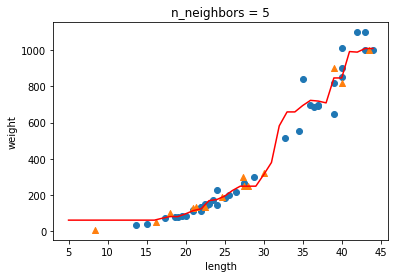

In [ ]:
x = np.arange(5,45).reshape(-1,1)
prediction = knr.predict(x)
plt.scatter(train_input, train_target)
plt.scatter(test_input,test_target,marker ='^')
plt.plot(x, prediction,'r')
plt.title('n_neighbors = {}'.format(5))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


mae = 타켓(실 무게) - 길이만 보고 무게 예측한 값의 절댓값들의 차를 평균화 한것
즉, 예측이 타켓과 19g만큼 차이가 난다

In [ ]:
print(knr.score(train_input,train_target))

0.9698823289099255


훈련세트를 가지고 훈련 했지만 훈련세트의 결정계수 값이 테스트세트보다 낮음
-> 모델이 너무 단순함 -> 제약 풀기 (과소적합 해소) -> 이웃의 개수를 줄여서 데이터의 전반적인 패턴을 인지하게 해서 모델을 더 복잡하게 함

0.9804899950518966
0.974645996398761


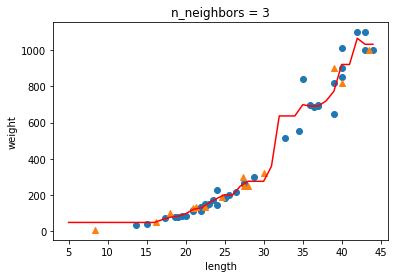

In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))
x = np.arange(5,45).reshape(-1,1)
prediction = knr.predict(x)
plt.scatter(train_input, train_target)
plt.scatter(test_input,test_target,marker ='^')
plt.plot(x, prediction,'r')
plt.title('n_neighbors = {}'.format(3))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
test_prediction = knr.predict(test_input)
print(test_prediction)
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

[  47.33333333   76.          247.66666667  120.          143.33333333
  921.66666667  275.          183.33333333  773.33333333  120.
 1033.33333333   62.66666667  275.          247.66666667]
35.42380952380951


모델을 좀더 복잡화 시켜서 훈련데이터를 잘 훈련하게 훈련데이터에 좀더 적합하게 수정 -> 테스트데이터의 결정계수가 낮아짐 -> 예측하는 값과 타켓의 평균 차가 더 높아짐

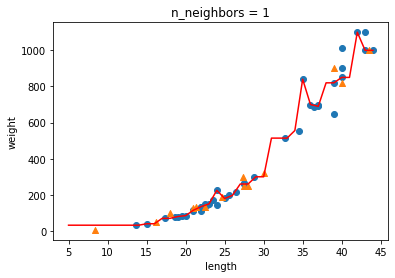

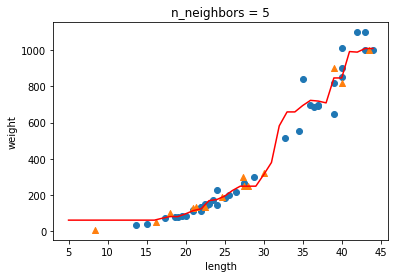

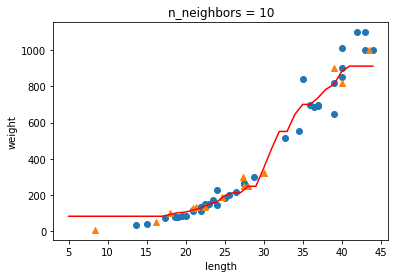

In [ ]:
knr2 = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,5,10]:
  knr2.n_neighbors = n
  knr2.fit(train_input,train_target)
  prediction = knr2.predict(x)
  plt.scatter(train_input, train_target)
  plt.scatter(test_input,test_target,marker ='^')
  plt.plot(x, prediction,'r')
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()



이웃의 수를 줄이면 예측하는 정도의 복잡도가 늘어남 -> 모델이 복잡해짐
이웃의 수를 늘리면 예측하는 정도가 데이터 전반의 패턴을 따름 -> 모델이 단순해짐